With Homotopy continuation, try some higher dimension global optimization problems. 

In [1]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
const d1, d2, ds = 2, 3, 1  # Degree range and step
const n, a, b = 3, 1, 1
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters

(0.9, 0.2)

In [2]:
results = main_gen(alpine, n, d1, d2, ds, delta, alph, C)


dimension Vector space: 10

sample size: 1000

dimension Vector space: 20

sample size: 2744


2-element Vector{Any}:
 [1.3201517572348007, 0.1, 0.4204872317622651, 0.10000000000000019, 1.5922151574131042e-17, 0.4204872317622649, 0.09999999999999974, 1.4279867387150528e-16, 2.8168887818021396e-16, 0.4204872317622658]
 [1.3201517572348005, 0.10000000000000005, 0.42048723176226643, 4.796448068117487e-20, 0.10000000000000012, 1.061220380520294e-17, 3.67459501605857e-17, 0.4204872317622663, -2.0768158752579367e-17, 7.650505236087983e-17, 0.09999999999999908, 8.197348745068649e-17, -2.0721055243822462e-16, 1.559318317550033e-16, 1.3481191721469022e-17, -2.2117263696157186e-16, 0.4204872317622659, 9.371388900358085e-18, -3.171905631273527e-16, -5.607092229556708e-16]

In [3]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, JSON, PlotlyJS, CSV
include("hom_solve.jl")

RRsolve (generic function with 1 method)

In [4]:
# Define your main function
@polyvar(x[1:n]) # Define polynomial ring 
function main()
    # @polyvar x[1:n] # Define polynomial ring

    h_x = []
    h_y = []
    h_z = []

    for (i, d) in enumerate(d1:ds:d2)
        local lambda = support_gen(n, d)[1] # Take support  
        local R = generateApproximant(lambda, results[i], :BigFloat) # Compute the approximant

        # Generate the system for HomotopyContinuation
        local P1 = differentiate(R, x[1])
        local P2 = differentiate(R, x[2])
        local P3 = differentiate(R, x[3])

        local S = RRsolve(n, [P1, P2, P3]) # HomotopyContinuation

        # Define the condition for filtering
        condition(point) = -1 < point[1] < 1 && -1 < point[2] < 1 && -1 < point[3] < 1

        # Filter points using the filter function
        filtered_points = filter(condition, S)
        println("Number of solutions: ", length(filtered_points))

        append!(h_x, [point[1] for point in filtered_points]) # For plotting
        append!(h_y, [point[2] for point in filtered_points])
        append!(h_z, [point[3] for point in filtered_points])
    end
    println(h_x)
    # Plotting using PlotlyJS
    plot(
        scatter3d(x=h_x, y=h_y, z=h_z, mode="markers", marker=attr(size=5)),
        Layout(title="3D Point Plot", scene=attr(xaxis=attr(title="X-axis"), yaxis=attr(title="Y-axis"), zaxis=attr(title="Z-axis")))
    )
end

main (generic function with 1 method)

Number of solutions: 1
Tracking 8 paths...  25%|███████▊                       |  ETA: 0:00:09



Tracking 8 paths... 100%|███████████████████████████████| Time: 0:00:03
  # paths tracked:                  8
  # non-singular solutions (real):  8 (2)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         8 (2)
Number of solutions: 1
Any[-0.05945483741616794, -0.05945483741616779]


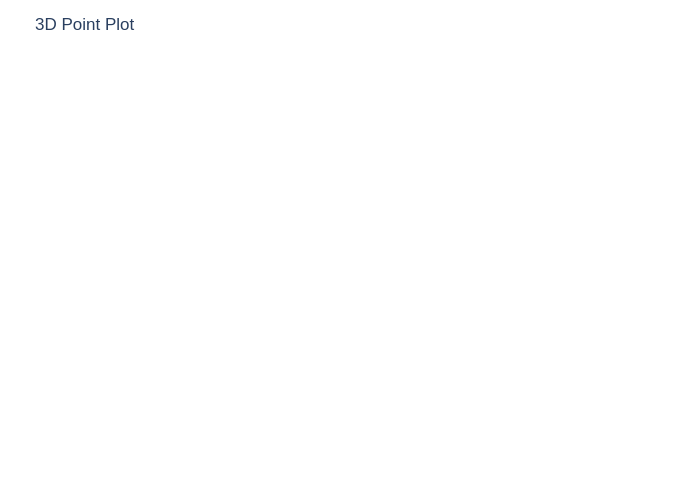

In [5]:
main()